## Inteligență Artificială  Tema 1 - 2025: Sokoban

Responsabili:
- Andrei Olaru
- Cătălin Chiru
- Andrei Dugăeșescu
- Mihai Nan
- Vlad Matei Drăghici
- Alexandru Baciu
- Bogdan-Andrei Sprîncenatu

In [92]:
from sokoban import Map, save_images, create_gif
import time
from sokoban.moves import *
import heuristics
from lrta_star import LRTAStar, solve_sokoban
import random

# Creating a map 

In [93]:
# Maps can be created using the Map class
map_from_init = Map(5, 5, 0, 0, [('box1', 1, 3)], [(4, 4)], [(3,3), (3,4), (3,1)], 'easy_map1')

# Maps can be created through yaml files
map_from_yaml = Map.from_yaml('tests/easy_map1.yaml')

assert str(map_from_init) == str(map_from_yaml), "Reading from yaml file Failed"

In [94]:
# Maps can also be created from their string representation
map_str = str(map_from_init)
map_from_str = Map.from_str(map_str)

assert str(map_from_init) == str(map_from_str), "String conversion Failed"

# Solving a map using LRTA*

In [95]:
# Load an easy map for testing
map = Map.from_yaml('tests/easy_map1.yaml')

# Create the LRTA* solver with default heuristic
solver = LRTAStar(map, max_iterations=500, time_limit=10)

# Solve the map
solution = solver.solve()

if solution:
    print("Solution found!")
    print(f"Number of moves: {len(solution)}")
    
    # Print the solution steps
    for i, move in enumerate(solution):
        print(f"Step {i+1}: {moves_meaning[move]}")
else:
    print("No solution found.")

Iteration 10, moves so far: 10
No best move found.
No solution found after 22 iterations.
No solution found.


# Visualizing the solution

In [96]:
# Visualize the solution steps as a GIF
if solution:
    # Apply the solution moves to create frames
    result_state = map.copy()
    solution_states = [result_state.copy()]
    
    for move in solution:
        result_state.apply_move(move)
        solution_states.append(result_state.copy())
    
    # Save solution frames
    save_images(solution_states, 'images/solution')
    
    # Create GIF from frames
    create_gif('images/solution', 'solution.gif', 'images')
    
    # Show the solved state
    solution_states[-1].plot_map()

# Testing different heuristics

In [97]:
# Test different heuristics
heuristic_functions = {
    'Sum of box-target distances': heuristics.sum_box_to_target_distances,
    'Minimum matching cost': heuristics.min_matching_cost,
    'Combined heuristic': heuristics.combined_heuristic
}

# Choose a more challenging map
medium_map = Map.from_yaml('tests/medium_map1.yaml')

for name, func in heuristic_functions.items():
    print(f"\nTesting heuristic: {name}")
    
    start_time = time.time()
    solver = LRTAStar(medium_map.copy(), heuristic_func=func, max_iterations=300, time_limit=5)
    solution = solver.solve()
    end_time = time.time()
    
    if solution:
        print(f"Solution found in {end_time - start_time:.2f} seconds")
        print(f"Number of moves: {len(solution)}")
    else:
        print("No solution found.")


Testing heuristic: Sum of box-target distances
Iteration 10, moves so far: 10
Iteration 20, moves so far: 20
Iteration 30, moves so far: 30
Iteration 40, moves so far: 40
Iteration 50, moves so far: 50
Iteration 60, moves so far: 60
Iteration 70, moves so far: 70
Iteration 80, moves so far: 80
Iteration 90, moves so far: 90
Solution found in 99 iterations, 99 moves.
Solution found in 0.02 seconds
Number of moves: 99

Testing heuristic: Minimum matching cost
Iteration 10, moves so far: 10
Iteration 20, moves so far: 20
Iteration 30, moves so far: 30
Iteration 40, moves so far: 40
Iteration 50, moves so far: 50
Iteration 60, moves so far: 60
Iteration 70, moves so far: 70
Solution found in 86 iterations, 86 moves.
Solution found in 0.02 seconds
Number of moves: 86

Testing heuristic: Combined heuristic
Iteration 10, moves so far: 10
Iteration 20, moves so far: 20
Iteration 30, moves so far: 30
Iteration 40, moves so far: 40
Iteration 50, moves so far: 50
Iteration 60, moves so far: 60
I

# Testing on different maps


Solving map: easy_map1.yaml
Iteration 10, moves so far: 10
Iteration 30, moves so far: 30
Iteration 40, moves so far: 40
Solution found in 43 iterations, 43 moves.
Solution steps:
Step 1: right
Step 2: right
Step 3: right
Step 4: up
Step 5: left
Step 6: left
Step 7: left
Step 8: up
Step 9: right
Step 10: right
Step 11: up
Step 12: up
Step 13: left
Step 14: left
Step 15: down
Step 16: up
Step 17: right
Step 18: left
Step 19: down
Step 20: down
Step 21: down
Step 22: down
Step 23: right
Step 24: right
Step 25: right
Step 26: right
Step 27: up
Step 28: up
Step 29: left
Step 30: right
Step 31: down
Step 32: left
Step 33: left
Step 34: up
Step 35: up
Step 36: down
Step 37: left
Step 38: left
Step 39: up
Step 40: up
Step 41: right
Step 42: right
Step 43: right
GIF saved at: images/easy_map1_solution.gif
GIF saved at: images/easy_map1_solution.gif


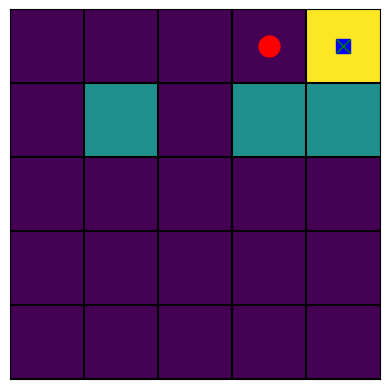


Solving map: easy_map2.yaml
Iteration 10, moves so far: 10
Solution found in 17 iterations, 17 moves.
Solution steps:
Step 1: right
Step 2: up
Step 3: left
Step 4: up
Step 5: right
Step 6: right
Step 7: right
Step 8: left
Step 9: left
Step 10: left
Step 11: down
Step 12: right
Step 13: right
Step 14: right
Step 15: right
Step 16: up
Step 17: up
GIF saved at: images/easy_map2_solution.gif
GIF saved at: images/easy_map2_solution.gif


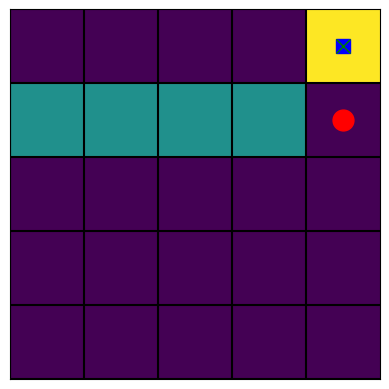


Solving map: medium_map1.yaml
Iteration 10, moves so far: 10
Iteration 20, moves so far: 20
Iteration 30, moves so far: 30
Iteration 40, moves so far: 40
Iteration 50, moves so far: 50
Iteration 60, moves so far: 60
Iteration 70, moves so far: 70
Iteration 80, moves so far: 80
Iteration 90, moves so far: 90
Iteration 100, moves so far: 100
Iteration 110, moves so far: 110
Iteration 120, moves so far: 120
Iteration 130, moves so far: 130
Iteration 140, moves so far: 140
Iteration 170, moves so far: 170
Iteration 180, moves so far: 180
Iteration 190, moves so far: 190
Iteration 200, moves so far: 200
Iteration 210, moves so far: 210
Iteration 230, moves so far: 230
Iteration 240, moves so far: 240
Iteration 250, moves so far: 250
Iteration 260, moves so far: 260
Iteration 270, moves so far: 270
Iteration 300, moves so far: 300
Iteration 310, moves so far: 310
Iteration 320, moves so far: 320
Iteration 330, moves so far: 330
Iteration 340, moves so far: 340
Iteration 350, moves so far: 3

In [98]:
# Test on different maps
test_maps = [
    'easy_map1.yaml',
    'easy_map2.yaml',
    'medium_map1.yaml',
    'hard_map1.yaml',
]

for map_name in test_maps:
    print(f"\nSolving map: {map_name}")
    
    solution_states = solve_sokoban(
        f'tests/{map_name}',
        heuristic_func=heuristics.combined_heuristic,
        max_iterations=5000,
        time_limit=50
    )
    
    if solution_states:
        # Save GIF of the solution
        save_path = f"images/{map_name.split('.')[0]}"
        save_images(solution_states, save_path)
        create_gif(save_path, f"{map_name.split('.')[0]}_solution.gif", 'images')
        
        # Display final state
        solution_states[-1].plot_map()

# Improved LRTA* Algorithm for Difficult Maps

In [99]:
# Improve the move selection for cases where we get stuck
def improved_solve_sokoban(map_path, heuristic_func=None, max_iterations=1000, time_limit=60, explore_factor=0.1):
    """Enhanced version of solve_sokoban with better exploration capabilities"""
    map_state = Map.from_yaml(map_path)
    solver = LRTAStar(map_state, heuristic_func, max_iterations, time_limit)
    
    # Store the original method that selects the best move
    original_score_move = solver.score_move
    
    def enhanced_score_move(state, move):
        # Use the original scoring method
        score = original_score_move(state, move)
        
        # Apply random exploration factor - occasionally make moves seem better
        if random.random() < explore_factor and score != float('inf'):
            # Make this move artificially better with some probability
            score -= random.randint(1, 10)
            
        return score
    
    # Replace the method
    solver.score_move = enhanced_score_move.__get__(solver, LRTAStar)
    
    # Also add a fallback mechanism for when no best move is found
    original_find_best_move = solver.find_best_move
    
    def enhanced_find_best_move(state, valid_moves):
        # Try the original method first
        best_move = original_find_best_move(state, valid_moves)
        
        # If no best move found, pick one that minimizes deadlock risk
        if best_move is None and valid_moves:
            # Find a move that avoids pushing boxes into corners or against walls
            safe_moves = []
            
            for move in valid_moves:
                # Prioritize non-pushing moves when stuck
                if move < BOX_LEFT:
                    safe_moves.append(move)
            
            # If there are safe moves, choose one randomly
            if safe_moves:
                best_move = random.choice(safe_moves)
            else:
                # If all moves are box pushes, choose any valid move
                best_move = random.choice(valid_moves)
                
        return best_move
    
    # Replace the method
    solver.find_best_move = enhanced_find_best_move.__get__(solver, LRTAStar)
    
    # Now solve with the enhanced method
    solution = solver.solve()
    
    if solution:
        # Apply the solution moves to visualize
        result_state = map_state.copy()
        solution_states = [result_state.copy()]
        
        for move in solution:
            result_state.apply_move(move)
            solution_states.append(result_state.copy())
        
        # Print the solution steps
        print("Solution steps:")
        for i, move in enumerate(solution):
            print(f"Step {i+1}: {moves_meaning[move]}")
        
        return solution_states
    else:
        return None

# Creating an Enhanced LRTA* Solver

In [ ]:
# Create a subclass of LRTAStar with enhanced exploration capabilities
class EnhancedLRTAStar(LRTAStar):
    def __init__(self, map_state: Map, heuristic_func=None, max_iterations=1000, time_limit=30, explore_factor=0.1):
        super().__init__(map_state, heuristic_func, max_iterations, time_limit)
        self.explore_factor = explore_factor  # Probability of random exploration
    
    def solve(self):
        """Enhanced solve method with better exploration and deadlock handling"""
        start_time = time.time()
        current_state = self.map.copy()
        solution_moves = []
        
        # Set to track visited states to avoid infinite loops
        visited_states = set()
        deadlock_states = set()  # Track states that lead to deadlocks
        cycle_count = 0
        max_cycle_count = 3
        
        iterations = 0
        while not current_state.is_solved() and iterations < self.max_iterations:
            if time.time() - start_time > self.time_limit:
                print(f"Time limit of {self.time_limit} seconds reached.")
                break
            
            iterations += 1
            current_state_str = str(current_state)
            
            # Check if state is a known deadlock
            if current_state_str in deadlock_states:
                print(f"Known deadlock detected. Restarting...")
                current_state = self.map.copy()
                solution_moves = []
                visited_states.clear()
                cycle_count = 0
                continue
            
            # Check if deadlock based on heuristic
            h_value = self.evaluate(current_state)
            if h_value == float('inf'):
                print(f"Deadlock detected on iteration {iterations}. Restarting...")
                deadlock_states.add(current_state_str)  # Remember this deadlock
                current_state = self.map.copy()
                solution_moves = []
                visited_states.clear()
                cycle_count = 0
                continue
            
            # Check if we've been in this state before (cycle detection)
            if current_state_str in visited_states:
                cycle_count += 1
                
                if cycle_count > max_cycle_count:
                    print(f"Detected persistent cycle. Restarting...")
                    current_state = self.map.copy()
                    solution_moves = []
                    visited_states.clear()
                    cycle_count = 0
                    continue
                
                # Try a random move to break out of cycle
                valid_moves = self.get_valid_moves(current_state)
                if valid_moves:
                    random_move = random.choice(valid_moves)
                    current_state.apply_move(random_move)
                    solution_moves.append(random_move)
                    continue
                else:
                    print("No valid moves available to break cycle.")
                    break
            
            visited_states.add(current_state_str)
            
            # Get valid moves
            valid_moves = self.get_valid_moves(current_state)
            if not valid_moves:
                print("No valid moves available.")
                break
            
            # Random exploration with probability explore_factor
            if random.random() < self.explore_factor:
                best_move = random.choice(valid_moves)
                print(f"Exploration move at iteration {iterations}")
            else:
                # Find best move using learned values
                best_move = None
                best_value = float('inf')
                
                for move in valid_moves:
                    next_state = current_state.copy()
                    next_state.apply_move(move)
                    h_val = self.evaluate(next_state)
                    
                    # For box movements, add extra incentive
                    bonus = 0
                    if move >= BOX_LEFT:
                        # Moving boxes is generally good
                        bonus -= 2
                        
                        # Extra bonus if we're pushing toward a target
                        box_move = move - 4  # Direction the box is moving
                        for box in next_state.boxes.values():
                            if (box.x, box.y) not in current_state.positions_of_boxes:  # This is the moved box
                                # Check if it's getting closer to any target
                                for target in next_state.targets:
                                    if abs(box.x - target[0]) + abs(box.y - target[1]) < \
                                       abs(box.x - dx[box_move-1] - target[0]) + abs(box.y - dy[box_move-1] - target[1]):
                                        bonus -= 5  # Big bonus for moving toward target
                                        break
                    else:
                        # For player movement, bonus for getting closer to boxes not on targets
                        player_pos = (next_state.player.x, next_state.player.y)
                        boxes_not_on_targets = [(box.x, box.y) for box in current_state.boxes.values() 
                                              if (box.x, box.y) not in current_state.targets]
                        
                        if boxes_not_on_targets:
                            # Are we getting closer to any box?
                            min_dist_before = min(abs(current_state.player.x - box[0]) + abs(current_state.player.y - box[1]) 
                                               for box in boxes_not_on_targets)
                            min_dist_after = min(abs(player_pos[0] - box[0]) + abs(player_pos[1] - box[1]) 
                                              for box in boxes_not_on_targets)
                            
                            if min_dist_after < min_dist_before:
                                bonus -= 3  # Bonus for getting closer to boxes
                    
                    # Final value includes heuristic plus bonus
                    value = h_val + bonus
                    
                    if value < best_value:
                        best_value = value
                        best_move = move
                
                # If no best move found, pick randomly
                if best_move is None:
                    print(f"No best move found at iteration {iterations}, choosing randomly")
                    best_move = random.choice(valid_moves)
            
            # Apply the best move
            next_state = current_state.copy()
            next_state.apply_move(best_move)
            
            # Update heuristic value
            h_current = self.h_table.get(current_state_str, float('inf'))
            h_next = self.evaluate(next_state)
            
            if h_next != float('inf'):
                # Update with larger learning rate for faster convergence
                updated_h = max(h_current, 1.3 * (1 + h_next))
                self.h_table[current_state_str] = min(updated_h, h_current + 5)  # Limit increase
            
            # Apply the move
            current_state = next_state
            solution_moves.append(best_move)
            
            # Print progress
            if iterations % 10 == 0:
                print(f"Iteration {iterations}, moves so far: {len(solution_moves)}")
        
        if current_state.is_solved():
            print(f"Solution found in {iterations} iterations, {len(solution_moves)} moves.")
            return solution_moves
        else:
            print(f"No solution found after {iterations} iterations.")
            return None

In [ ]:
# Function to solve using the enhanced solver
def improved_solve_sokoban(map_path, heuristic_func=None, max_iterations=1000, time_limit=60, explore_factor=0.15):
    """Solve using the EnhancedLRTAStar class"""
    map_state = Map.from_yaml(map_path)
    solver = EnhancedLRTAStar(
        map_state, 
        heuristic_func, 
        max_iterations, 
        time_limit,
        explore_factor
    )
    
    # Solve with the enhanced algorithm
    solution = solver.solve()
    
    if solution:
        # Apply the solution moves to visualize
        result_state = map_state.copy()
        solution_states = [result_state.copy()]
        
        for move in solution:
            result_state.apply_move(move)
            solution_states.append(result_state.copy())
        
        # Print the solution steps
        print("Solution steps:")
        for i, move in enumerate(solution):
            print(f"Step {i+1}: {moves_meaning[move]}")
        
        return solution_states
    else:
        return None

In [100]:
# Test the improved solver on the medium map that was problematic
print("Solving medium_map1.yaml with improved algorithm...")
solution_states = improved_solve_sokoban(
    'tests/medium_map1.yaml',
    heuristic_func=heuristics.combined_heuristic,
    max_iterations=5000,
    time_limit=60,
    explore_factor=0.15  # 15% chance of random exploration
)

if solution_states:
    # Save GIF of the solution
    save_path = "images/medium_map1_improved"
    save_images(solution_states, save_path)
    create_gif(save_path, "medium_map1_improved_solution.gif", 'images')
    
    # Display final state
    solution_states[-1].plot_map()

Solving medium_map1.yaml with improved algorithm...


AttributeError: 'LRTAStar' object has no attribute 'score_move'

# Comparing Original vs Improved Algorithm

In [ ]:
# Compare the original and improved algorithms on multiple maps
comparison_maps = [
    'medium_map1.yaml',
    'hard_map1.yaml'
]

for map_name in comparison_maps:
    print(f"\n{'='*50}\nComparing algorithms on {map_name}\n{'='*50}")
    
    # Time limit and iterations for fair comparison
    time_limit = 30
    max_iterations = 1000
    
    # Original algorithm
    print("\nRunning original algorithm:")
    start_time = time.time()
    original_solution = solve_sokoban(
        f'tests/{map_name}',
        heuristic_func=heuristics.combined_heuristic,
        max_iterations=max_iterations,
        time_limit=time_limit
    )
    original_time = time.time() - start_time
    
    # Improved algorithm
    print("\nRunning improved algorithm:")
    start_time = time.time()
    improved_solution = improved_solve_sokoban(
        f'tests/{map_name}',
        heuristic_func=heuristics.combined_heuristic,
        max_iterations=max_iterations,
        time_limit=time_limit,
        explore_factor=0.15
    )
    improved_time = time.time() - start_time
    
    # Compare results
    print("\nComparison Results:")
    print(f"Original algorithm: {'' if original_solution else 'No '}Solution found in {original_time:.2f} seconds")
    print(f"Improved algorithm: {'' if improved_solution else 'No '}Solution found in {improved_time:.2f} seconds")
    
    if original_solution and improved_solution:
        print(f"Original solution length: {len(original_solution)-1} moves")
        print(f"Improved solution length: {len(improved_solution)-1} moves")
    
    # If the improved algorithm found a solution, display it
    if improved_solution:
        # Save comparison GIF
        save_path = f"images/{map_name.split('.')[0]}_improved"
        save_images(improved_solution, save_path)
        create_gif(save_path, f"{map_name.split('.')[0]}_improved_solution.gif", 'images')
        
        # Display final state
        improved_solution[-1].plot_map()